## Observations and Insights 

* Capomulin and Ramican have the lowest average tumor volume.  These two drugs also have the lowest standard deviation, meaning their values are closer to the average than the other drugs.  The company might want to consider further analyzing Ramican as it performed on par (or slightly better) than Capomulin.


* Out of four treatments (Capomulin, Ceftamin, Infubinol, and Ramicane), both Capomulin and Ramicane had similarly low tumor volumes as measured by the final tumor volume for each mouse.  This further shows how Ramicane could be another drug of interest.  


* There is a strong correlation between the weight of the mouse and the average tumor volume for the Capomulin treatment.  The company might want to analyze this further to see if weight affects how well the treatment works, or if there is some other factor affecting this outcome.  


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
merge_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = merge_df[merge_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_id = duplicate_df["Mouse ID"].unique().tolist()
print(duplicate_id)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
for id in duplicate_id:
    dup_index = merge_df[merge_df["Mouse ID"] == id].index
dup_df = merge_df.iloc[dup_index,:]
print(dup_df)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop(dup_index)


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

tumor_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().to_frame().rename(columns={"Tumor Volume (mm3)":"Mean"})
tumor_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median().to_frame().rename(columns={"Tumor Volume (mm3)":"Median"})
tumor_var = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var().to_frame().rename(columns={"Tumor Volume (mm3)":"Variance"})
tumor_std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std().to_frame().rename(columns={"Tumor Volume (mm3)":"Standard Deviation"})
tumor_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem().to_frame().rename(columns={"Tumor Volume (mm3)":"SEM"})

summary_df = pd.concat([tumor_mean, tumor_median, tumor_var, tumor_std, tumor_sem], axis=1)

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

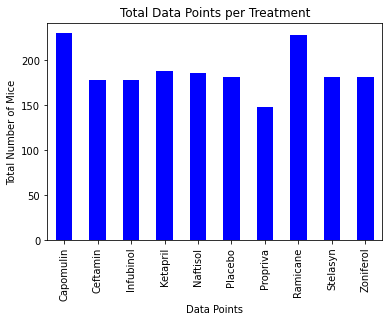

In [9]:
# Generate a bar plot showing the total number of data points for each treatment throughout the course of the study using pandas. 
mouse_data = clean_df.groupby("Drug Regimen")["Mouse ID"].count()

mouse_data.plot(kind="bar", facecolor="blue")
plt.title("Total Data Points per Treatment")
plt.ylabel("Total Number of Mice")
plt.xlabel("Data Points")
plt.show()

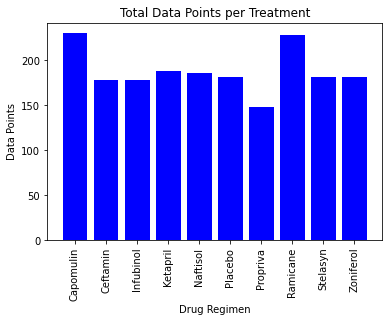

In [10]:
# Generate a bar plot showing the total number of data points for each treatment throughout the course of the study using pyplot.
drugs = mouse_data.to_frame().reset_index()
x_axis = np.arange(len(mouse_data))

plt.bar(x_axis, mouse_data, color="b",align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs["Drug Regimen"], rotation="vertical")
plt.title("Total Data Points per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.show()

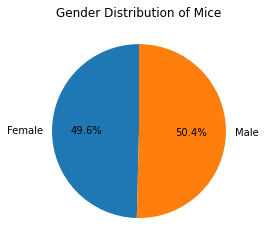

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender = clean_df.groupby("Sex")["Mouse ID"].nunique()

mouse_gender.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.ylabel("")
plt.title("Gender Distribution of Mice")
plt.show()

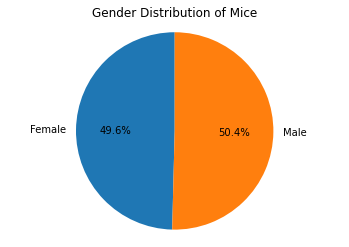

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = mouse_gender.to_frame().reset_index()

plt.title("Gender Distribution of Mice")
plt.pie(mouse_gender, labels=genders["Sex"], autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time = clean_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_time_df = pd.merge(clean_df, last_time, on="Mouse ID")
last_time_df = last_time_df.loc[last_time_df["Timepoint_x"] == last_time_df["Timepoint_y"]]
last_time_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45


In [14]:
# Put treatments into a list for for loop 
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# collect rows with drugs listed in treatment list
tumor_df = pd.DataFrame()
tumor_df = last_time_df[last_time_df["Drug Regimen"].isin(treatments)]
tumor_df = tumor_df[["Drug Regimen", "Tumor Volume (mm3)"]]
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].quantile([.25,.5,.75])
quartiles.unstack().reset_index()
for treatment in treatments:
    lowerq = quartiles.loc[treatment][0.25]
    upperq = quartiles.loc[treatment][0.75]
    median = quartiles.loc[treatment][0.5]
    iqr = (upperq-lowerq)
    lower_bound = (lowerq - (1.5*iqr))
    upper_bound = (upperq + (1.5*iqr))
    outlier_df = tumor_df.loc[tumor_df["Drug Regimen"] == treatment]
    outlier2_df = outlier_df.loc[(outlier_df["Tumor Volume (mm3)"] > upper_bound) \
                             | (outlier_df["Tumor Volume (mm3)"] < lower_bound)]
    outliers = outlier2_df["Tumor Volume (mm3)"].round(decimals=2).to_list()
    print(f"---------- Info for {treatment} ----------")
    print(f"The lower quartile is: {lowerq.round(decimals=2)}")
    print(f"The upper quartile is: {upperq.round(decimals=2)}")
    print(f"The median is: {median.round(decimals=2)}")
    print(f"The interquartile range is: {iqr.round(decimals=2)}")
    print(f"Values below {lower_bound.round(decimals=2)} could be outliers.")
    print(f"Values above {upper_bound.round(decimals=2)} could be outliers.")
    if outlier2_df.empty:
        print(f"There aren't any values beyond the upper and lower bounds.")
    elif len(outliers) > 1:
        print(f"There are potential outliers with Tumor Volumes of: {outliers}")
    else:
        print(f"There is a potential outlier with a Tumor Volume of: {outliers}")
    print(" ")

---------- Info for Capomulin ----------
The lower quartile is: 32.38
The upper quartile is: 40.16
The median is: 38.13
The interquartile range is: 7.78
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.
There aren't any values beyond the upper and lower bounds.
 
---------- Info for Ramicane ----------
The lower quartile is: 31.56
The upper quartile is: 40.66
The median is: 36.56
The interquartile range is: 9.1
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
There aren't any values beyond the upper and lower bounds.
 
---------- Info for Infubinol ----------
The lower quartile is: 54.05
The upper quartile is: 65.53
The median is: 60.17
The interquartile range is: 11.48
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.
There is a potential outlier with a Tumor Volume of: [36.32]
 
---------- Info for Ceftamin ----------
The lower quartile is: 48.72
The upper quartile is: 64.3
The median is: 59.85
The interqua

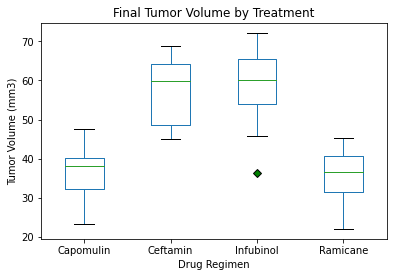

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_diamond = dict(markerfacecolor='g', marker='D')

tumor_df.boxplot(column=["Tumor Volume (mm3)"], by="Drug Regimen", grid=False, flierprops=green_diamond)
plt.title("Final Tumor Volume by Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.suptitle("")
plt.show()

## Line and Scatter Plots

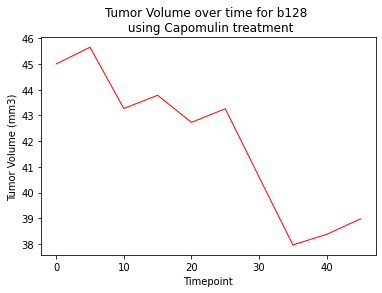

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
drug = "Capomulin"
drug_id_list = clean_df.groupby("Drug Regimen")["Mouse ID"].min()
drug_id = drug_id_list["Drug Regimen" == drug]

drug_df = clean_df.loc[clean_df["Mouse ID"] == drug_id]

x_axis = drug_df["Timepoint"]
y_axis = drug_df["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis, color="red", linewidth=1)
plt.title(f"Tumor Volume over time for {drug_id} \n using {drug} treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

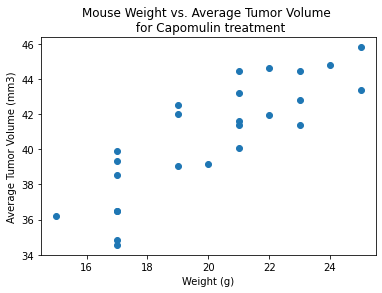

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
drug = "Capomulin"

weight_df = clean_df.loc[clean_df["Drug Regimen"] == drug]

avg_tumor = weight_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().to_frame()
mouse_weight = weight_df.groupby("Mouse ID")["Weight (g)"].min().to_frame()
tumor_weight_df = pd.concat([avg_tumor, mouse_weight], axis = 1).reset_index()

weight_data = tumor_weight_df["Weight (g)"]
tumor_data = tumor_weight_df["Tumor Volume (mm3)"]

plt.scatter(weight_data, tumor_data, marker="o")
plt.title(f"Mouse Weight vs. Average Tumor Volume \n for {drug} treatment")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84
Linear Regression Model: y = 0.95x + 21.55


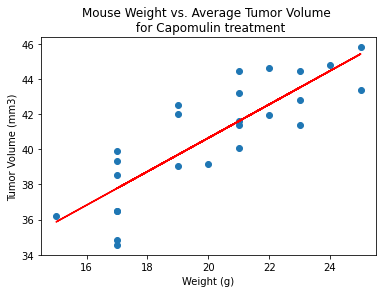

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(weight_data,tumor_data)
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_data, tumor_data)
regress_values = weight_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Linear Regression Model: {line_eq}")

plt.scatter(weight_data,tumor_data, marker="o")
plt.plot(weight_data,regress_values,"r-")
plt.title(f"Mouse Weight vs. Average Tumor Volume \n for {drug} treatment")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()